In [2]:
# Loading necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
sound_file = './sound/beep-01a.wav'

In [3]:
df = pd.read_csv('FACTDATA_MAR2017.txt')
# fix datatypes
column_names = df.columns.values
column_datatypes = {}
for i in range(16):
    column_datatypes[column_names[i]] = str
column_datatypes[column_names[16]] = np.int64
for i in range(17, 19):
    column_datatypes[column_names[i]] = np.float64
#print len(column_datatypes)
# Reload dataset
df = pd.read_csv('FACTDATA_MAR2017.txt', dtype=column_datatypes)
print df.shape
print df.dtypes

D:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2087715, 19)
AGYSUB         object
LOC            object
AGELVL         object
EDLVL          object
GSEGRD         object
LOSLVL         object
OCC            object
PATCO          object
PPGRD          object
SALLVL         object
STEMOCC        object
SUPERVIS       object
TOA            object
WORKSCH        object
WORKSTAT       object
DATECODE       object
EMPLOYMENT      int64
SALARY        float64
LOS           float64
dtype: object


## List of columns and their attributes
<center>
AGYSUB   &emsp;   Agency     &emsp;    Non-ordinal<br />
LOC      &emsp;   Location   &emsp;   Non-ordinal<br />
AGELVL   &emsp;   Age Level     &emsp;     Ordinal<br />
EDLVL    &emsp;   Educational level   &emsp;   Ordinal<br />
GSEGRD   &emsp;   General Schedule and Equivalent Grade  &emsp;   Ordinal<br />
LOSLVL   &emsp;   Length of Service Level   &emsp;    Ordinal<br />
OCC      &emsp;   Occupation    &emsp;     Not Ordinal<br />
PATCO     &emsp;  Occupation Category &emsp; Not Ordinal<br />
PPGRD     &emsp;  Pay Plan and Grade   &emsp;   Ordinal<br />
SALLVL    &emsp;     Salary Level    &emsp;   Ordinal<br />
STEMOCC   &emsp;     STEM Occupation &emsp; Not Ordinal<br />
SUPERVIS  &emsp;     Supervisory Status   &emsp;   Ordinal<br />
TOA       &emsp;     Type of Appointment &emsp; Not Ordinal<br />
WORKSCH   &emsp;     Work Schedule   &emsp;   Ordinal<br />
WORKSTAT  &emsp;     Work Status &emsp; Not Ordinal<br />
SALARY    &emsp;    Salary<br />
LOS       &emsp;    Length of Service<br />
</center>

** Ordinal Attributes on which I can turn into numeric labels **
1. Age Level (reduced to, say, the average age of the interval of the label)
2. Educational Level (reduced to, say, years of education)
4. Supervisory Status
5. Work Schedule (reduced to full-time vs non-full-time)

** Attributes that can serve as numeric elements alone **
6. Salary
7. Length of Service

** Attributes that will be interesting, but which we cannot convert into ordered variables **
8. Location
9. Occupation Category
10. Whether it is STEM occupation

## Data Cleaning

In [18]:
# First, remove columns that only have one kind of value because it provides us no information. 
#df = df.drop(['DATECODE', 'EMPLOYMENT'], axis='columns')
# Second, remove "unspecified" values in all columns, as they are a trivial part of the population that do not provide much information
# In the next step, it is worth it to really look at what people tend to have unspecified fields.
# But for the purpose of this analysis we cannot care less about their internal management
print df.shape
df = df[(df.WORKSCH != '*') &
        (df.SALLVL != 'Z') &
        (df.PATCO != '9') &
        (df.AGELVL != 'Z') & 
        (df.LOSLVL != 'Z') & 
        (df.SUPERVIS != '*') &
        (df.GSEGRD != '**') &
        (df.TOA != '**') &
        (df.TOA != '99') &
        (df.EDLVL != '**') & 
        (df.EDLVL.notnull())]
print df.shape
# For other columns there are too many values that I can't explore them in full

(2081135, 20)
(2079600, 20)


## Data Manipulation

The purpose of this step is to reduce the dimensions of the data to more simple terms.

In [5]:
# Next step, we want to reduce the dimensions, so we want to transform categorical variables into ordinal, continuous variables
# import seaborn
import seaborn as sns

In [6]:
# find out the names of the occupation categories

PATCO          1         2         3         4         5         6
SALLVL                                                            
A       0.000115  0.000050  0.000037  0.001396  0.000000  0.002391
B       0.007469  0.002018  0.016089  0.105243  0.034523  0.047178
C       0.002746  0.005011  0.170546  0.493675  0.096091  0.118497
D       0.018540  0.027066  0.374229  0.291245  0.204772  0.216747
E       0.038577  0.065629  0.249096  0.075367  0.197930  0.296032
F       0.087523  0.113394  0.094996  0.023379  0.128350  0.184686
G       0.120725  0.140286  0.041488  0.007938  0.090456  0.074765
H       0.115792  0.135095  0.020826  0.001133  0.131833  0.031403
I       0.110963  0.121919  0.014101  0.000362  0.061631  0.016307
J       0.097345  0.108338  0.009452  0.000154  0.024421  0.007344
K       0.088973  0.087895  0.004275  0.000072  0.013050  0.002271
L       0.072227  0.060932  0.003334  0.000018  0.006606  0.000543
M       0.051380  0.043213  0.000819  0.000009  0.004416  0.00

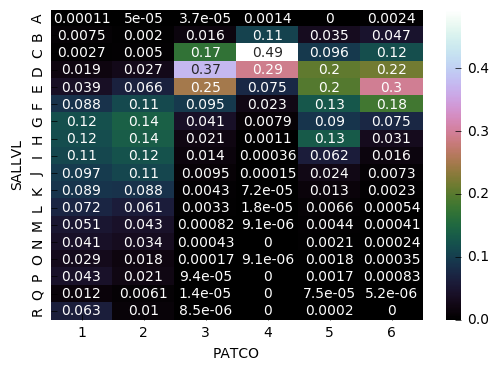

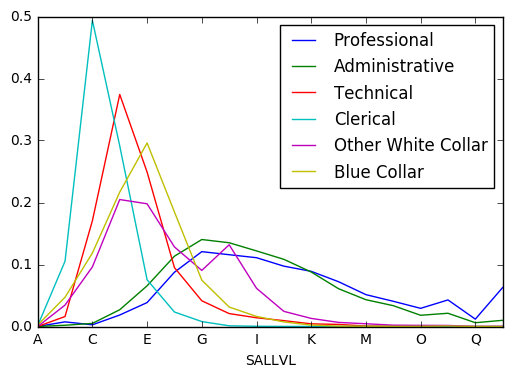

In [8]:
# Heat map of salary level vs occupation category
SALLVL_vs_PATCO = df.groupby(['SALLVL', 'PATCO']).size().unstack().fillna(0).apply(lambda x: x / sum(x), axis='index')
print SALLVL_vs_PATCO
sns.heatmap(SALLVL_vs_PATCO, annot=True,cmap='cubehelix')
SALLVL_vs_PATCO.plot()
plt.legend(['Professional', 'Administrative', 'Technical', 'Clerical', 'Other White Collar', 'Blue Collar'])
plt.show()

## Data Preparation

In this step, I quantify ordinal categorical variables, but I want to know how I can classify other non-ordinal categorical data

** First, there are these variables that I need to turn into numerical variables **
1. Age Level (reduced to, say, the average age of the interval of the label)
2. Educational Level (reduced to, say, years of education)
4. Supervisory Status
5. Work Schedule (reduced to full-time vs non-full-time)

In [9]:
# Age Level
# Print age level dataframe
age_level = pd.read_csv('DTagelvl.txt')
age_level

,AGELVL,AGELVLT
0,A,Less than 20
1,B,20-24
2,C,25-29
3,D,30-34
4,E,35-39
5,F,40-44
6,G,45-49
7,H,50-54
8,I,55-59
9,J,60-64


In [13]:
# Give a numeric value to age level
age_lvls = [chr(num) for num in range(ord('A'), ord('A') + 11)]
age_lvlt = 17
age_dict = {}
for age_lvl in age_lvls:
    age_dict[age_lvl] = age_lvlt
    age_lvlt += 5
df['AGE'] = df['AGELVL'].map(lambda x: age_dict[x])

In [16]:
# Educational Level
# Print educational level dataframe
edu_level = pd.read_csv('DTedlvl.txt')
edu_level

,EDLVLTYP,EDLVLTYPT,EDLVL,EDLVLT
0,1,BELOW HIGH SCHOOL,01,01-NO FORMAL EDUCATION OR SOME ELEMENTARY SCHO...
1,1,BELOW HIGH SCHOOL,02,02-ELEMENTARY SCHOOL COMPLETED - NO HIGH SCHOOL
2,1,BELOW HIGH SCHOOL,03,03-SOME HIGH SCHOOL - DID NOT COMPLETE
3,2,HIGH SCHOOL OR EQUIVALENCY,04,04-HIGH SCHOOL GRADUATE OR CERTIFICATE OF EQUI...
4,3,OCCUPATIONAL PROGRAM,05,05-TERMINAL OCCUPATIONAL PROGRAM - DID NOT COM...
5,3,OCCUPATIONAL PROGRAM,06,06-TERMINAL OCCUPATIONAL PROGRAM - CERTIFICATE...
6,4,BETWEEN HS & BACHELORS,07,07-SOME COLLEGE - LESS THAN ONE YEAR
7,4,BETWEEN HS & BACHELORS,08,08-ONE YEAR COLLEGE
8,4,BETWEEN HS & BACHELORS,09,09-TWO YEARS COLLEGE
9,4,BETWEEN HS & BACHELORS,10,10-ASSOCIATE DEGREE


In [26]:
# Take the EDLVL and map to values in the EDLVLTYP column
# Build dictionary of values
edlvl_dict = {}
edlvls_available = np.unique(df['EDLVL'])
for edlvl in edlvls_available:
    edlvl_dict[edlvl] = int(edu_level[edu_level.EDLVL == edlvl].iloc[0].EDLVLTYP)

get_edlvl_type = lambda x: edlvl_dict[x]
df['EDLVLTYP'] = df['EDLVL'].map(get_edlvl_type)
Audio(url=sound_file, autoplay=True)

In [28]:
# Supervisory Status
# Print supervisory status dataframe
supervis_status = pd.read_csv('DTsuper.txt')
supervis_status

,SUPERTYP,SUPERTYPT,SUPERVIS,SUPERVIST
0,1,Supervisor,2,2-SUPERVISOR OR MANAGER
1,2,Leader,6,6-LEADER
2,2,Leader,7,7-TEAM LEADER
3,3,Non-Supervisor,4,4-SUPERVISOR (CSRA)
4,3,Non-Supervisor,5,5-MANAGEMENT OFFICIAL (CSRA)
5,3,Non-Supervisor,8,8-ALL OTHER POSITIONS
6,4,Unspecified,*,*-UNSPECIFIED


In [32]:
# Take the SUPERVIS and map to values in the SUPERTYP column
# Build dictionary of values
supervis_dict = {}
supervis_available = np.unique(df['SUPERVIS'])
for supervis in supervis_available:
    # 3 for supervisor, 2 for leader and 1 for non-supervisor
    supervis_dict[supervis] = 4 - int(supervis_status[supervis_status.SUPERVIS == supervis].iloc[0].SUPERTYP)

get_supervis_type = lambda x: supervis_dict[x]
df['SUPERTYP'] = df['SUPERVIS'].map(get_supervis_type)
Audio(url=sound_file, autoplay=True)

In [31]:
# Work schedule
# Print work schedule dataframe
work_schedule = pd.read_csv('DTwrksch.txt')
work_schedule

,WSTYP,WSTYPT,WORKSCH,WORKSCHT
0,1,Full-time,B,B - Full-time Nonseasonal Baylor Pln
1,1,Full-time,F,F - Full-time Nonseasonal
2,1,Full-time,G,G - Full-time Seasonal
3,1,Full-time,H,H - Full-time On-call
4,2,Not Full-time,I,I - Intermittent Nonseasonal
5,2,Not Full-time,J,J - Intermittent Seasonal
6,2,Not Full-time,P,P - Part-time Nonseasonal
7,2,Not Full-time,Q,Q - Part-time Seasonal
8,2,Not Full-time,R,R - Part-time On-call
9,2,Not Full-time,S,S - Part-time Job Sharer Nonseasonal


In [33]:
# Take the WORKSCH and map to values in the WSTYP column
# Build dictionary of values
worksch_dict = {}
worksch_available = np.unique(df['WORKSCH'])
for worksch in worksch_available:
    # 2 for full-time and 1 for part-time
    worksch_dict[worksch] = 3 - int(work_schedule[work_schedule.WORKSCH == worksch].iloc[0].WSTYP)

get_worksch_type = lambda x: worksch_dict[x]
df['WSTYP'] = df['WORKSCH'].map(get_worksch_type)
Audio(url=sound_file, autoplay=True)

** Summarize features that have been made numeric **

In [103]:
#numeric_features = ['AGE', 'EDLVLTYP', 'SUPERTYP', 'WSTYP', 'SALARY', 'LOS']
numeric_features = ['AGE', 'EDLVLTYP', 'SALARY', 'LOS']
pca_features = df[numeric_features]

In [104]:
pca_features.dtypes

AGE           int64
EDLVLTYP      int64
SALARY      float64
LOS         float64
dtype: object

In [39]:
pca_features.head(15)

,AGE,EDLVLTYP,SUPERTYP,WSTYP,SALARY,LOS
0,67,9,1,2,161900.0,42.4
1,47,6,3,2,172100.0,7.4
2,52,6,3,2,172100.0,24.2
3,27,6,1,2,79720.0,0.9
4,27,6,1,2,79720.0,0.8
5,32,6,1,2,79720.0,0.0
6,32,5,1,2,60470.0,9.3
7,32,9,1,1,79720.0,0.2
8,32,6,1,2,149337.0,7.5
9,37,6,1,2,112021.0,1.8


## First PCA analysis without including non-ordinal features

First, we try to find out the correlation matrix

               AGE  EDLVLTYP    SALARY       LOS
AGE       1.000000  0.039606  0.242883  0.538715
EDLVLTYP  0.039606  1.000000  0.447524 -0.015878
SALARY    0.242883  0.447524  1.000000  0.312606
LOS       0.538715 -0.015878  0.312606  1.000000


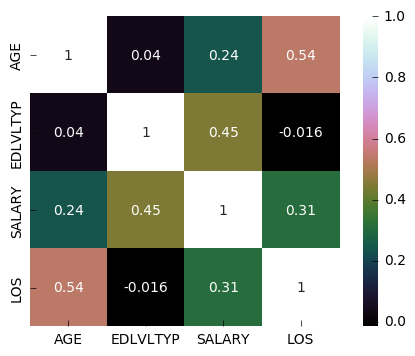

In [105]:
Sigma = pca_features.corr()
print Sigma

sns.heatmap(Sigma, square=True, annot=True,cmap='cubehelix')
plt.show()

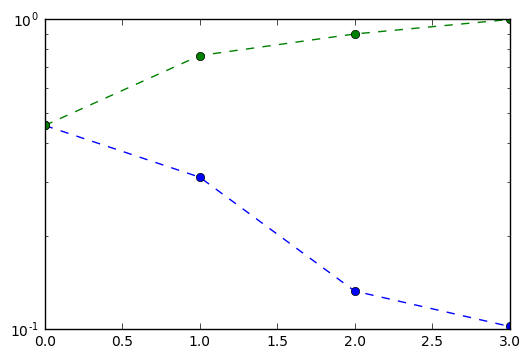

In [106]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

z_scaler = StandardScaler()

z_data = z_scaler.fit_transform(pca_features)
pca_trafo = PCA().fit(z_data)
                     
plt.semilogy(pca_trafo.explained_variance_ratio_, '--o')
plt.semilogy(pca_trafo.explained_variance_ratio_.cumsum(), '--o')
plt.show()

#plt.figure()
#pca_data = pca_trafo.transform()
#sns.heatmap(np.log(pca_trafo.inverse_transform(np.eye(pca_features.shape[1]))), cmap="hot", cbar=False)
#plt.show()

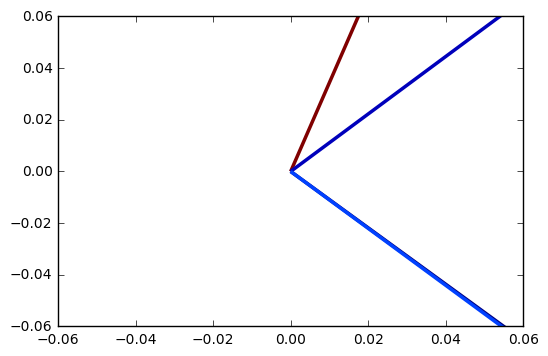

In [114]:
# Visualization of first 2 components:
z_scaler = StandardScaler()

z_data = z_scaler.fit_transform(pca_features)
pca_trafo = PCA(n_components=2).fit(z_data)

pca_data = pca_trafo.transform(z_data)
#plt.plot(pca_data[:,0], pca_data[:,1], 'o', alpha=0.02)

unitv_transformations = pca_trafo.transform(np.eye(z_data.shape[1]))

# AGE	EDLVLTYP	SUPERTYP	WSTYP	SALARY	LOS
plt.quiver(0, 0, unitv_transformations[:,0].transpose(), unitv_transformations[:,1].transpose(),
           np.hypot(unitv_transformations[:,0].transpose(), unitv_transformations[:,1].transpose()), scale=1)
#plt.xlim(-0.02, 0.02)
#plt.quiverkey(QV1, 0.01, 0.01, )
# clockwise: 1 is education, 3 is supervisory,  4 is work schedule, 2 is salary, 5 is length of service, and 6 is age
# THe most relevant factors to the two principle components are: supervisory / work schedule vs education
plt.show()

In [112]:
np.hypot(unitv_transformations[:,0].transpose(), unitv_transformations[:,1].transpose())

array([ 0.67145169,  0.78153148,  0.67733914,  0.69251199])

The graph tells us that we can use three variables to summarize 80% of the variations in data. Better than average, but still not that good to motivate us to discard two other variables. We may proceed in the next step to using K-mean clustering